### DATASET

Qui viene importato il file *./dataset/dataset.py*, che in maniera automatica estrae l'archivio *archive.zip*. Fatto ciò assegna una label ad ogni classe in base alla cartella di appartenenza: 
<ul>
    <li>glass: 1,
    <li>paper: 2,
    <li>cardboard: 3,
    <li>plastic: 4,
    <li>metal: 5,
    <li>trash: 6.
</ul>
<br>
Infine divide l'intero dataset in training, validation e test set nella seguente proporzione:
65% per il train, il 15% per la validation e il 20% per il test.
Questi saranno richiamate nel codice a seguire.

In [19]:
import importlib
from dataset import dataset
importlib.reload(dataset)

print("Dati di training: \n", dataset.train[:10])

Dataset già presente.
Dati di training: 
                                                    path  label
1100  ./dataset/garbage_dataset/Garbage classificati...      3
1289  ./dataset/garbage_dataset/Garbage classificati...      3
256   ./dataset/garbage_dataset/Garbage classificati...      4
102   ./dataset/garbage_dataset/Garbage classificati...      4
1996  ./dataset/garbage_dataset/Garbage classificati...      2
2286  ./dataset/garbage_dataset/Garbage classificati...      2
1152  ./dataset/garbage_dataset/Garbage classificati...      3
225   ./dataset/garbage_dataset/Garbage classificati...      4
142   ./dataset/garbage_dataset/Garbage classificati...      4
1541  ./dataset/garbage_dataset/Garbage classificati...      1


### PRE-PROCESSING

<h2>SCRIVERE QUALCOSA SULLE TRASFORM CHE FACCIAMO </h2>

In [20]:
from src import preProcessing as pre
importlib.reload(pre)

garbage_train = dataset.CSVImageDataset('./dataset', './dataset/CSV/train.csv', transform = pre.train_transform)
garbage_valid = dataset.CSVImageDataset('./dataset', './dataset/CSV/valid.csv', transform = pre.test_transform)
garbage_test = dataset.CSVImageDataset('./dataset','./dataset/CSV/test.csv', transform = pre.test_transform)

Dispositivo attivo: cpu


In [21]:
from torch.utils.data import DataLoader

garbage_train_loader = DataLoader(garbage_train,  batch_size=32, num_workers=2,  shuffle=True)
garbage_valid_loader = DataLoader(garbage_valid,  batch_size=32, num_workers=2)
garbage_test_loader = DataLoader(garbage_test, batch_size=32,  num_workers=2)

Plottiamo una distribuzione delle immagini divise in base alla classe:

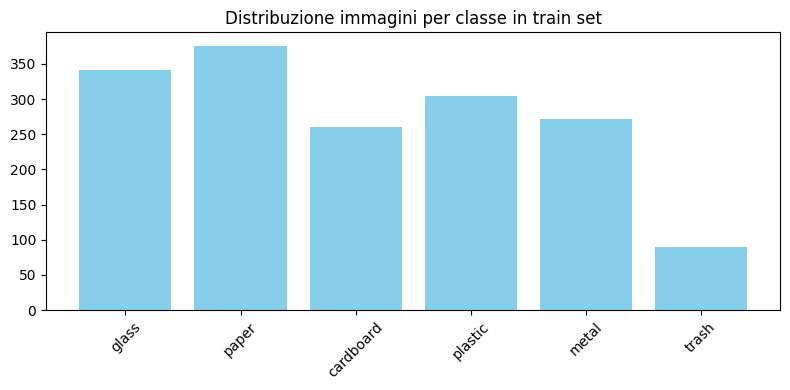

In [22]:
from src import evaluation as eval

eval.plot_class_distribution(garbage_train_loader, dataset.class_dict, "Distribuzione immagini per classe in train set")

Notiamo che la classe trash è molto meno popolata rispetto alle altre, per questo faremo aumenteremo dinamicamente i dati duplicando n (in questo caso 2) volte i campioni della classe trash nel training set.

In [23]:
garbage_train_loader = pre.data_augumentation(garbage_train, 5, garbage_train_loader, 2, 32)

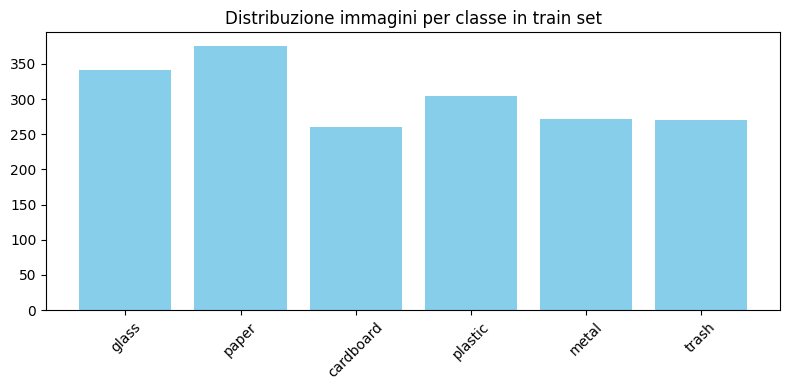

In [24]:
eval.plot_class_distribution(garbage_train_loader, dataset.class_dict, "Distribuzione immagini per classe in train set")

### CLASSIFICAZIONE

# SCRIVERE QUALCOSA QUI
Per semplicitá, verrá spiegato come si è fatto training, testing ed evaluation del migliore dei 4 esperimenti effettuati.

In [ ]:
from src import classifier
importlib.reload(classifier)

loss_history_train, loss_history_val = [], []
acc_history_train,  acc_history_val  = [], []
title = f"runs/garbage_best_model"

In [ ]:
trained_model = classifier.train_validate(
        garbage_train_loader = garbage_train_loader,
        garbage_valid_loader = garbage_valid_loader,
        log_dir=title,
        early_stop=0, dropout = True,
        epochs       = 3,
        lr           = 1e-3,
        momentum     = 0.9,
        device       = pre.device,
        log_every    = 20,
        resume_from='./savings/checkpoint_epoch_dropout'
)

/home/giada/Uni/Machine Learning/Garbage-Classification/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Label originali: min=0, max=5, unique=tensor([0, 1, 2, 3, 4, 5])
Numero classi modello: 6


In [ ]:
checkpoint = torch.load('./savings/best_model.pt')
model.load_state_dict(checkpoint['model_state_dict'])